In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random

In [2]:
data_cluster = pd.read_csv('data_regression.csv', dtype={"SESS_ID":np.str},thousands=",")
data_cluster.head()

,CLNT_ID,ACTIVE_DAYS,N_SESS,N_PRODUCT,N_LOGIN,PURCHASE_CYCLE,HITS_SEQ,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,...,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,CLNT_GENDER,CLNT_AGE
0,8,118,2,1,2,59.0,57.000000,4.5,46.500000,417.000000,...,0,0,0,0,0,0,2,0,M,20
1,14,20,1,2,1,20.0,284.000000,5.0,256.000000,7098.000000,...,0,0,0,0,0,0,2,0,F,30
2,32,20,2,4,2,10.0,58.000000,101.4,98.200000,2169.000000,...,0,0,0,0,0,0,5,0,M,40
3,56,97,2,2,2,48.5,47.333333,82.0,45.666667,1157.666667,...,0,0,0,0,1,0,0,2,F,40
4,58,74,1,5,1,74.0,209.000000,8.0,195.000000,3161.000000,...,0,1,0,0,0,0,5,0,F,30


In [3]:
data_cluster.columns

Index(['CLNT_ID', 'ACTIVE_DAYS', 'N_SESS', 'N_PRODUCT', 'N_LOGIN',
       'PURCHASE_CYCLE', 'HITS_SEQ', 'SESS_SEQ', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'PD_BUY_AM', 'TOTAL_BUY_AM_x', 'TOTAL_BUY_AM_y',
       'TOTAL_CT', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'weekend_weekday',
       'weekend_weekend', 'CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3',
       'CLAC0_4', 'CLAC0_5', 'CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9',
       'CLNT_GENDER', 'CLNT_AGE'],
      dtype='object')

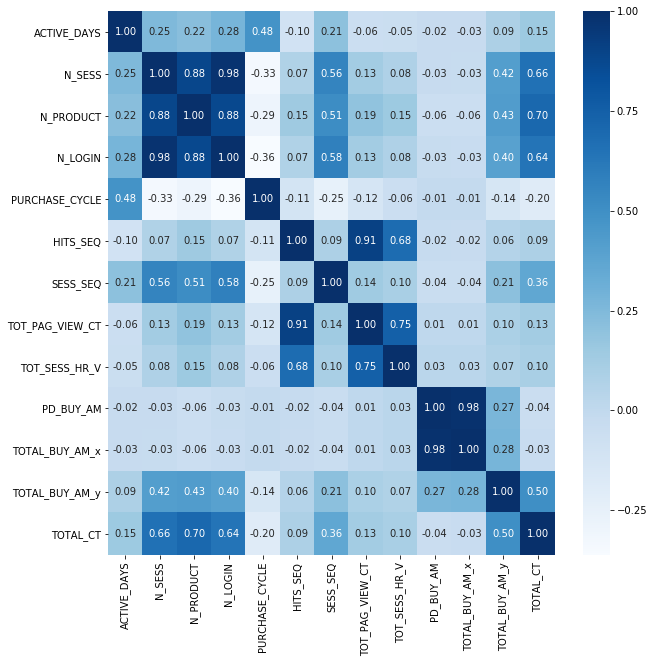

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
# annot : anooation 각 셀의 값을 표시할지 결정
# fmt : annot가 true일 경우에 숫자 표시를 어떻게 할지
sns.heatmap(data=data_cluster[data_cluster.columns[1:14]].corr(),cmap='Blues',annot=True,fmt='.2f')

In [19]:
data_cluster = data_cluster.drop(['PD_BUY_AM','HITS_SEQ','N_SESS','N_SESS','N_PRODUCT'], axis=1)

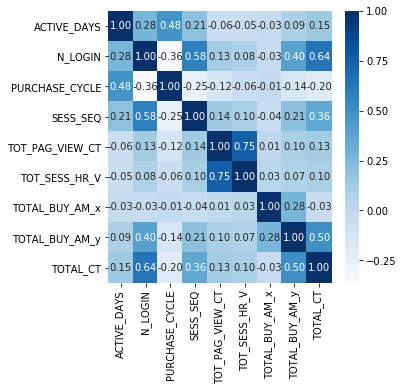

In [20]:
plt.figure(figsize=(5,5))
sns.heatmap(data=data_cluster[data_cluster.columns[1:10]].corr(),cmap='Blues',annot=True,fmt='.2f')

### 50대 남자 Cluster

In [21]:
cluster = data_cluster.loc[(data_cluster['CLNT_GENDER'] == 'M') & (data_cluster['CLNT_AGE'] == 50)]
del data_cluster
cluster = cluster.drop(['CLNT_ID','CLNT_GENDER','CLNT_AGE'], axis=1)
print(cluster.shape)
cluster.head()

(7741, 53)


,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
119,25,4,6.250000,51.500000,151.800000,1487.700000,21600.000000,216000,11,0.0,...,0,1,0,0,0,0,0,3,5,2
155,24,3,8.000000,68.600000,68.400000,618.000000,23520.000000,117600,7,0.0,...,0,0,3,0,3,0,0,0,1,0
161,29,2,14.500000,142.000000,123.000000,1306.500000,282500.000000,565000,2,0.0,...,0,0,0,0,0,0,0,0,1,1
245,23,3,7.666667,97.333333,88.666667,1304.333333,117200.000000,351600,3,0.0,...,0,0,0,3,0,0,0,0,0,0
276,170,2,85.000000,11.333333,65.666667,958.333333,149933.333333,449800,3,0.0,...,0,0,0,1,2,0,0,0,0,0


In [31]:
cluster.columns

Index(['ACTIVE_DAYS', 'N_SESS', 'N_PRODUCT', 'N_LOGIN', 'PURCHASE_CYCLE',
       'HITS_SEQ', 'SESS_SEQ', 'TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V', 'PD_BUY_AM',
       'TOTAL_BUY_AM_x', 'TOTAL_BUY_AM_y', 'TOTAL_CT', 'DVC_desktop',
       'DVC_mobile', 'DVC_tablet', 'ZON_Busan', 'ZON_Chungcheongbuk-do',
       'ZON_Chungcheongnam-do', 'ZON_Daegu', 'ZON_Daejeon', 'ZON_Gangwon-do',
       'ZON_Gwangju', 'ZON_Gyeonggi-do', 'ZON_Gyeongsangbuk-do',
       'ZON_Gyeongsangnam-do', 'ZON_Incheon', 'ZON_Jeju-do',
       'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul', 'ZON_Ulsan',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'weekend_weekday',
       'weekend_weekend', 'CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3',
       'CLAC0_4', 'CLAC0_5', 'CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9',
       'predict'],
      dtype='object')

In [22]:
#대대분류 삭제
cluster_drop = cluster.drop(cluster.loc[:, cluster.columns.str.startswith('CLAC0')], axis = 1)
print(cluster_drop.shape)
cluster_drop.head() 

(7741, 43)


,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,month_9,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,weekend_weekday,weekend_weekend
119,25,4,6.250000,51.500000,151.800000,1487.700000,21600.000000,216000,11,0.0,...,1.0,0.000000,0.0,0.000000,0.100000,0.1,0.800000,0.0,0.500000,0.500000
155,24,3,8.000000,68.600000,68.400000,618.000000,23520.000000,117600,7,0.0,...,1.0,0.200000,0.6,0.000000,0.000000,0.0,0.000000,0.2,0.200000,0.800000
161,29,2,14.500000,142.000000,123.000000,1306.500000,282500.000000,565000,2,0.0,...,1.0,0.500000,0.0,0.000000,0.500000,0.0,0.000000,0.0,0.500000,0.500000
245,23,3,7.666667,97.333333,88.666667,1304.333333,117200.000000,351600,3,0.0,...,1.0,0.333333,0.0,0.333333,0.333333,0.0,0.000000,0.0,0.333333,0.666667
276,170,2,85.000000,11.333333,65.666667,958.333333,149933.333333,449800,3,0.0,...,0.0,0.000000,0.0,0.333333,0.000000,0.0,0.666667,0.0,0.666667,0.333333


In [30]:
mms = MinMaxScaler()
mms.fit(cluster) #대대분류 뺀 column들만 갖고
cluster_transformed = mms.transform(cluster)

### Choosing the Number of Clusters : Elbow Method

In [31]:
SSD = []

for k in range(1,10):
    km = KMeans(n_clusters = k)
    km = km.fit(cluster_transformed)
    SSD.append(km.inertia_)

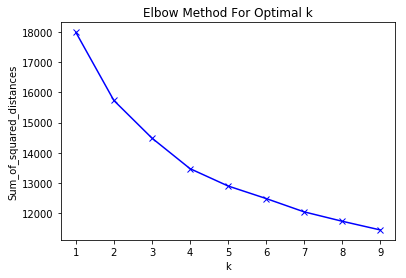

In [32]:
plt.plot(range(1,10), SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
k=3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_transformed) # 데이터를 이용하여 클러스터링을 위한 학습 시작하고 중심점 추출

cluster_transformed = pd.DataFrame(cluster_transformed)
cluster_transformed.columns = cluster.columns
cluster_transformed.index = cluster.index
cluster_transformed['predict'] = km.predict(cluster_transformed)
cluster_transformed.head()

,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,predict
119,0.131868,0.030303,0.028846,0.020957,0.301408,0.117623,0.006684,0.000770,0.011655,0.0,...,0.047619,0.00000,0.000000,0.000000,0.0,0.0,0.008523,0.034965,0.008333,0
155,0.126374,0.020202,0.038462,0.028054,0.133602,0.047924,0.007308,0.000417,0.006993,0.0,...,0.000000,0.02439,0.000000,0.027273,0.0,0.0,0.000000,0.006993,0.000000,1
161,0.153846,0.010101,0.074176,0.058514,0.243461,0.103101,0.091449,0.002020,0.001166,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.006993,0.004167,2
245,0.120879,0.020202,0.036630,0.039978,0.174380,0.102928,0.037744,0.001255,0.002331,0.0,...,0.000000,0.00000,0.025210,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1
276,0.928571,0.010101,0.461538,0.004288,0.128102,0.075199,0.048379,0.001607,0.002331,0.0,...,0.000000,0.00000,0.008403,0.018182,0.0,0.0,0.000000,0.000000,0.000000,0


In [35]:
cluster_transformed['predict'].value_counts()

0    3231
2    2326
1    2184
Name: predict, dtype: int64

In [39]:
# predict clustering 0
idx = np.where(cluster_transformed['predict'] == 0)
cluster_0 = cluster.loc[cluster.index[idx]]

# predict clustering 1
idx = np.where(cluster_transformed['predict'] == 1)
cluster_1 = cluster.loc[cluster.index[idx]]

# predict clustering 2
idx = np.where(cluster_transformed['predict'] == 2)
cluster_2 = cluster.loc[cluster.index[idx]]

In [40]:
pd.DataFrame({"cluster0":round(cluster_0.mean(),2),"cluster1":round(cluster_1.mean(),2),"cluster2":round(cluster_2.mean(),2)})

,cluster0,cluster1,cluster2
ACTIVE_DAYS,117.95,92.05,115.65
N_LOGIN,3.88,2.23,3.46
PURCHASE_CYCLE,56.10,58.56,56.51
SESS_SEQ,112.13,71.55,100.76
TOT_PAG_VIEW_CT,82.45,92.27,80.47
TOT_SESS_HR_V,1436.72,1608.54,1415.96
TOTAL_BUY_AM_x,72746.97,80592.90,82319.99
TOTAL_BUY_AM_y,391583.16,295253.90,531228.12
TOTAL_CT,8.31,5.00,7.82
DVC_desktop,0.00,0.00,0.00


In [45]:
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

In [46]:
sum_of_sum = cluster[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
sum_of_sum

CLAC0_0     2447
CLAC0_1     1860
CLAC0_2     1967
CLAC0_3    12502
CLAC0_4     4751
CLAC0_5      319
CLAC0_6     1080
CLAC0_7     4667
CLAC0_8    20693
CLAC0_9     5651
dtype: int64

<BarContainer object of 10 artists>

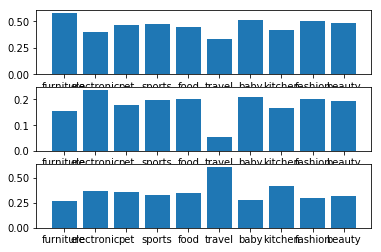

In [47]:
# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.bar(labels, sum0/sum_of_sum)

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.bar(labels, sum1/sum_of_sum)

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 3)
plt.bar(labels, sum2/sum_of_sum)

In [48]:
clutering = pd.concat([sum0,sum1,sum2],axis=1)
#clutering = clutering.reindex(['오'])
clutering['labels'] = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
clutering

,0,1,2,labels
CLAC0_0,1404,381,662,furniture
CLAC0_1,738,439,683,electronic
CLAC0_2,909,348,710,pet
CLAC0_3,5975,2468,4059,sports
CLAC0_4,2129,959,1663,food
CLAC0_5,107,17,195,travel
CLAC0_6,551,226,303,baby
CLAC0_7,1935,773,1959,kitchen
CLAC0_8,10339,4203,6151,fashion
CLAC0_9,2752,1104,1795,beauty


In [52]:
pd.concat([sum0/sum_of_sum,sum1/sum_of_sum,sum2/sum_of_sum],axis=1)

,0,1,2
CLAC0_0,0.573764,0.155701,0.270535
CLAC0_1,0.396774,0.236022,0.367204
CLAC0_2,0.462125,0.176919,0.360956
CLAC0_3,0.477924,0.197408,0.324668
CLAC0_4,0.448116,0.201852,0.350032
CLAC0_5,0.335423,0.053292,0.611285
CLAC0_6,0.510185,0.209259,0.280556
CLAC0_7,0.414613,0.165631,0.419756
CLAC0_8,0.499638,0.203112,0.297250
CLAC0_9,0.486993,0.195364,0.317643


<BarContainer object of 10 artists>

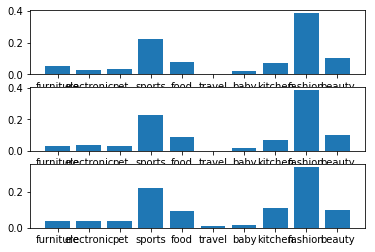

In [50]:
# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.bar(labels, sum0/sum0.sum())

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.bar(labels, sum1/sum1.sum())

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 3)
plt.bar(labels, sum2/sum2.sum())